# Parcial 1

Proponer una rna (modelo de machine learning) para identificar si la imagen RX 3D pertenece a un hombre o a una mujer, para esto debe utilizar las imágenes publicadas en:

https://www.nlm.nih.gov/research/visible/getting_data.html *

Enlaces al final de la página web enlace VHP Male, VHP Female)

	Recomendaciones:
Seleccionar la radiografía más apropiada para el problemas por ejemplo tórax o pelvis

Descargar un porcentaje pequeño de las imágenes por clase para probar el modelo primario

¿Cambiar formato? png->jpeg

Trabajar con imágenes en escala de grises

Redimensionar Las imagenes para reducir complejidad al 25%

Aplicar transformaciones a la imagen que crea conveniente por ejemplo bordes, regiones cerradas, etc

Utilizar la técnica PCA/HOG para obtener un vector de características de la imagen

Ejercicio calificable, máximo 2 estudiantes, 13/09/2024

Posibles aplicaciones

Mantenimiento de máquinas

Medicina

Microscopía

Defectos o Fallas

Satelitales

Otras



In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=1f44f548cd9b9e938576ac71c6f3bbfea5ecc0177c841a28dd6e177feadf37ed
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import requests
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import preprocessing
import tarfile
import pickle
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
import os
import wget
from skimage import io
import matplotlib.pyplot as plt
from skimage.util import crop
from sklearn.decomposition import PCA
import tensorflow_datasets as imdb
from tensorflow.keras.layers import TextVectorization
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import re
import string
import tensorflow as tf
import numpy as np
import random as rnd

In [ ]:
os.makedirs('hombres')
os.makedirs('mujeres')

Separo los datos de las imagenes en dos carpetas para asi clasificar su genero

In [ ]:
max_hombres = 297
max_mujeres = 250
url  = 'https://data.lhncbc.nlm.nih.gov/public/Visible-Human/Female-Images/PNG_format/pelvis/'
#for i in range(1732,1953):
#Se limita la descarga a 100 fotos.
for i in range(1732,1832):
  imgurla = 'avf'+str(i)+'a.png'
  #imgurlb = 'avf'+i+'b.png'
  #imgurlc = 'avf'+i+'c.png'
  wget.download(url+imgurla,'./mujeres/'+imgurla)


In [ ]:

url = 'https://data.lhncbc.nlm.nih.gov/public/Visible-Human/Male-Images/PNG_format/pelvis/'
#for i in range(1732,2028):
#Se limita la descarga a 100 fotos
for i in range(1732,1832):
  imgurla = 'a_vm'+str(i)+'.png'
  wget.download(url+imgurla,'./hombres/'+imgurla)


Rescato las imagenes de cada carpeta llevandolas a un np.array y acompañandolos de un label para su posterior procesamiento.

In [ ]:
def cargar_imagenes(max_imagenes=None):
  for i, filename in enumerate(os.listdir(hombres_folder)):
    if max_imagenes and i >= max_imagenes:
      break
    if filename.endswith('.jpg') or filename.endswith('.png'):
      img = io.imread(os.path.join(hombres_folder, filename))
      images.append(img)
      labels.append('hombre')
  for i, filename in enumerate(os.listdir(mujeres_folder)):
    if max_imagenes and i >= max_imagenes:
      break
    if filename.endswith('.jpg') or filename.endswith('.png'):
      img = io.imread(os.path.join(mujeres_folder, filename))
      images.append(img)
      labels.append('mujer')

In [ ]:
hombres_folder = 'hombres'
mujeres_folder = 'mujeres'
images = []
labels = []
cargar_imagenes()
images = np.array(images)
labels = np.array(labels)

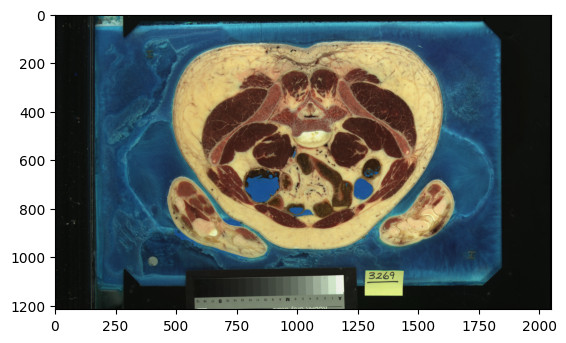

hombre
['hombre' 'mujer']


In [ ]:
plt.imshow(images[15])
plt.show()
print(labels[15])
print(np.unique(labels))

In [ ]:
label_encoder = preprocessing.LabelEncoder()
labels= label_encoder.fit_transform(labels)
print(np.unique(labels))
print(labels[15])

[0 1]
0


Se realiza las siguientes modificaciones a las imagenes.
Escala de grises.

Resize.

Recorte.

In [ ]:
processed_images = []
print("Shape img original: ", images[0].shape)
for img in images:
  resized_img = resize(img, (256, 256))
  #cropped_image = crop(resized_img, ((20, 40), (50, 50), (0, 0)))
  processed_images.append(resized_img)
processed_images = np.array(processed_images)
print("Imagen procesada: ",processed_images[0].shape)

Shape img original:  (1216, 2048, 3)
Imagen procesada:  (256, 256, 3)


In [ ]:
combined_data = {"Image Data": [], "Label": []}

for i in range(len(processed_images)):
  img = processed_images[i]
  label = labels[i]

  combined_data["Image Data"].append(img)
  combined_data["Label"].append(label)
input = np.array(combined_data["Image Data"])
#print(input)
output = np.array(combined_data["Label"])
print(output)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print("Número de imágenes (input):", input.shape[0])
print("Número de etiquetas (output):", output.shape[0])

Número de imágenes (input): 200
Número de etiquetas (output): 200


In [ ]:
# Suponiendo que input y output son tus datos originales
input = np.array(combined_data["Image Data"])
output = np.array(output)

#input_flattened = input.reshape(input.shape[0], -1)

# Verificar la forma después de aplanar
#print("Forma de input_flattened:", input_flattened.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input,output, test_size=0.3, shuffle=True)

In [ ]:
num_classes=1
model = tf.keras.Sequential()
# normalizamos la matriz de entrada para trabajar con valores entre 0 y 1
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(256,256,3)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), activation='relu', strides=1, padding='same'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(7, 7), activation='relu', strides=1, padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu', strides=1, padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu', strides=1, padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu', strides=1, padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
# Desactivamos el 30 % de las conexiones de forma aleatoria
model.add(tf.keras.layers.Dropout(0.3)),
model.add(tf.keras.layers.Dense(128, activation='relu')),
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 128)       │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 3,706,113 (14.14 MB)

 Trainable params: 3,706,113 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam ()
model.compile(
  optimizer=optimizer,
  loss=tf.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 688s 133s/step - accuracy: 0.5039 - loss: 0.0000e+00
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 739s 130s/step - accuracy: 0.5291 - loss: 0.0000e+00
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 685s 132s/step - accuracy: 0.5030 - loss: 0.0000e+00
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 754s 134s/step - accuracy: 0.5078 - loss: 0.0000e+00
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 734s 132s/step - accuracy: 0.5069 - loss: 0.0000e+00
Epoch 6/50


In [ ]:
y_pred=model.evaluate(X_test, y_test)
print(y_pred)

In [ ]:
pos = rnd.randint(0, len(X_test)-1)
print('Original label', np.argmax(y_test[pos]))
imgO = X_test[pos]
print("Forma de la imagen original:", imgO.shape)

img = imgO.reshape(1, 512, 512, 3)  # Ajustar la forma para que coincida con la entrada del modelo
print("Forma de la imagen redimensionada:", img.shape)

plt.imshow(imgO) # Mostrar la imagen original
plt.show()

# Realizar la predicción con el modelo
predictions = model.predict(img)
print('Original label', np.argmax(y_test[pos]))
print('Predict label',np.argmax(predictions))